<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Multi-Factor Scores

Overview 

Create a "distress score" using as_factor() based on ICR and Altman.

Creates bins for "zombie and distressed", just zombies, just distressed, and neither. This is somewhat atypical because we normally we bin a variable or score from lowest to highest (or vice versa) but here we are assigning a different score to just zombies and just distressed, even though we don't know which is better or worse. That's okay, the goal is to see the cumulative performance of the two indicators, alone and combined. 

In [2]:
from zipline.pipeline import master, sharadar, Pipeline, Constant, periodic
from zipline.pipeline.factors import AnnualizedVolatility
from codeload.fundamental_factors.universe import BaseUniverse

universe = BaseUniverse() 

icr = sharadar.InterestCoverageRatio('ART', mask=universe)

icr_zone = Constant(0).where(icr<1, Constant(1).where(icr<2, Constant(2)))

previous_icr = sharadar.InterestCoverageRatio('ART', period_offset=-4, mask=universe)
previous_icr_zone = Constant(0).where(previous_icr<1, Constant(1).where(previous_icr<2, Constant(2)))

fundamentals = sharadar.Fundamentals.slice('ART')

de = fundamentals.DE.latest
growth = periodic.PeriodicPercentChange(fundamentals.REVENUE, window_length=4, mask=universe)

pipeline = Pipeline(
    columns={
        'icr_zone': icr_zone,
        'previous_icr_zone': previous_icr_zone,
        'de': de.quantiles(4, mask=universe),
        'sales_growth': growth.quantiles(4, mask=universe),
        'size': fundamentals.MARKETCAP.latest.quantiles(4, mask=universe),
    },
    screen=universe
)

,min,max,mean,std,count,avg daily count,count %
Factor Quantile,,,,,,,
1,0.000,0.000,0.000,0.000,"863,219",156.3,3.9%
2,1.000,1.000,1.000,0.000,"1,362,994",246.8,6.1%
3,2.000,2.000,2.000,0.000,"19,996,287",3620.5,90.0%


,1D,21D,5D
Ann. alpha,0.003,-0.003,0.001
beta,-0.039,-0.045,-0.047
Mean Relative Return Top Quantile (bps),-0.033,-0.075,-0.055
Mean Relative Return Bottom Quantile (bps),-0.474,0.197,-0.151
Mean Spread (bps),0.441,-0.111,0.205


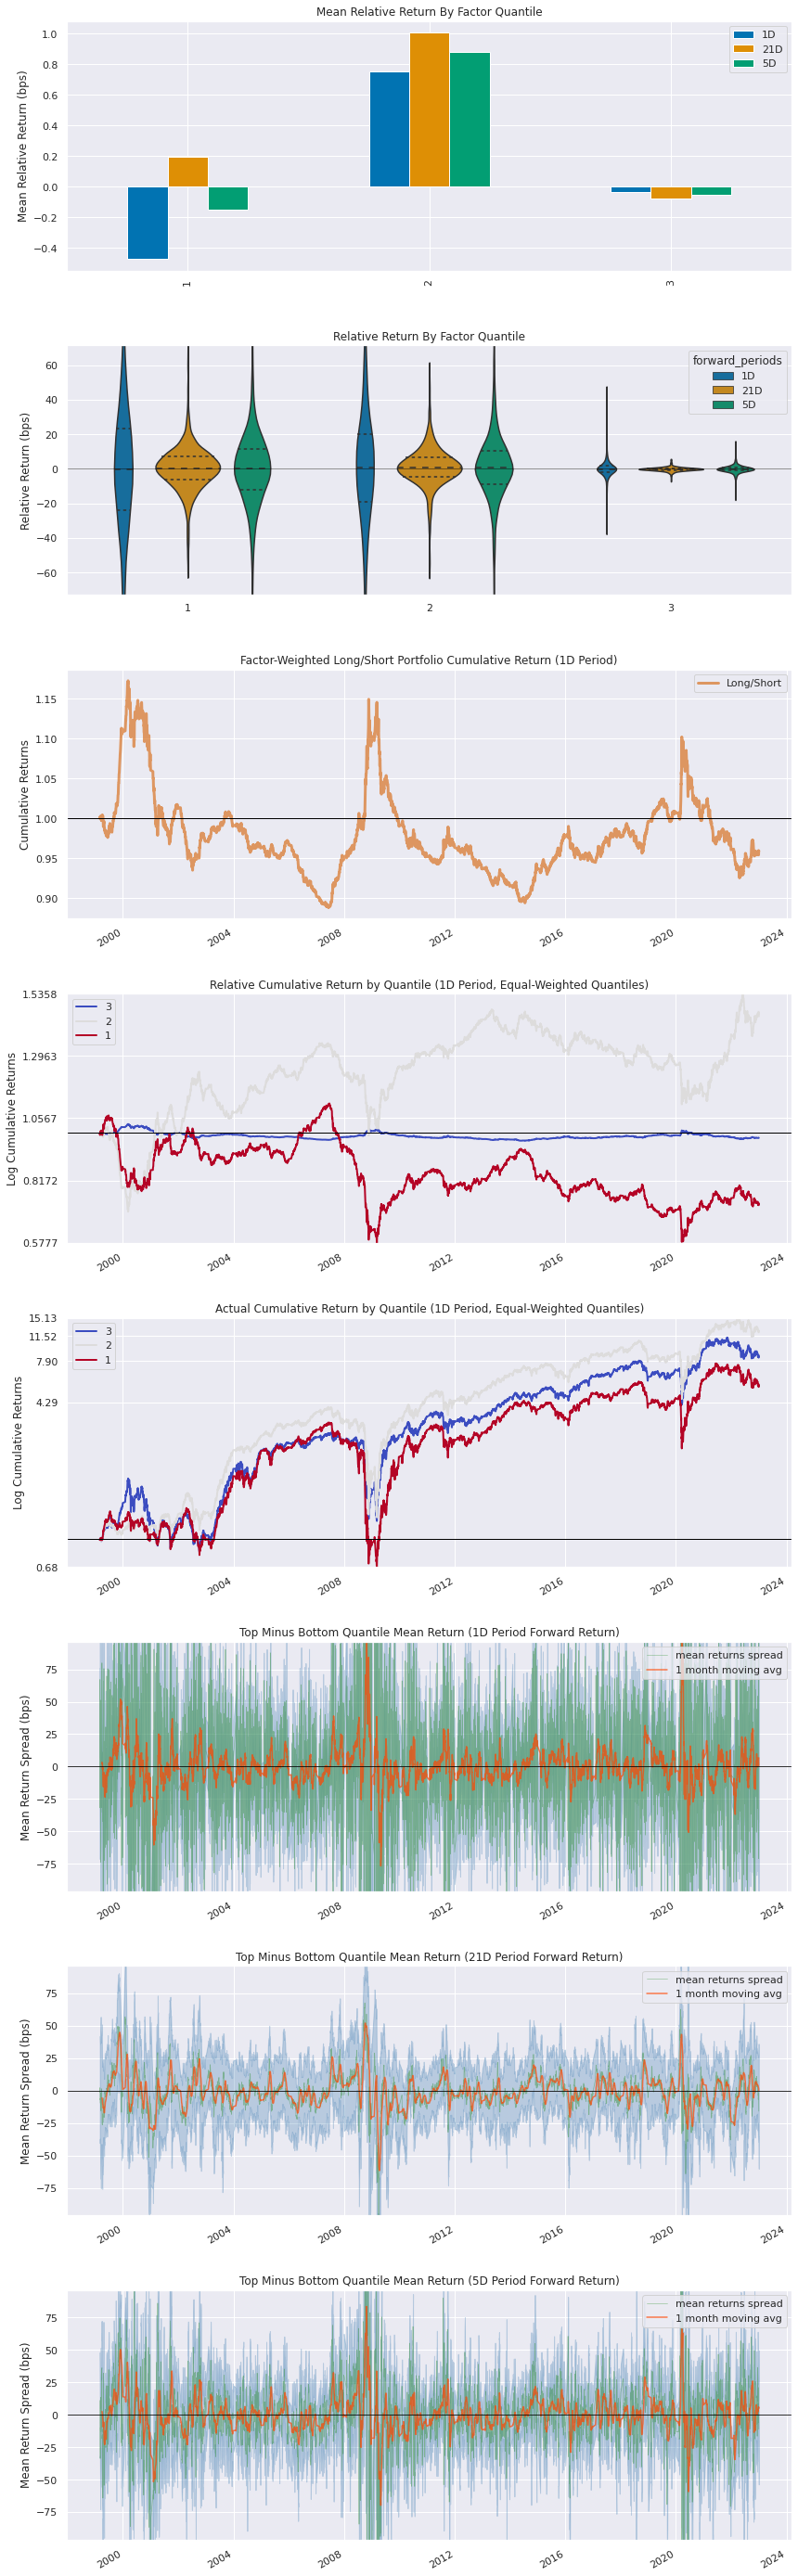

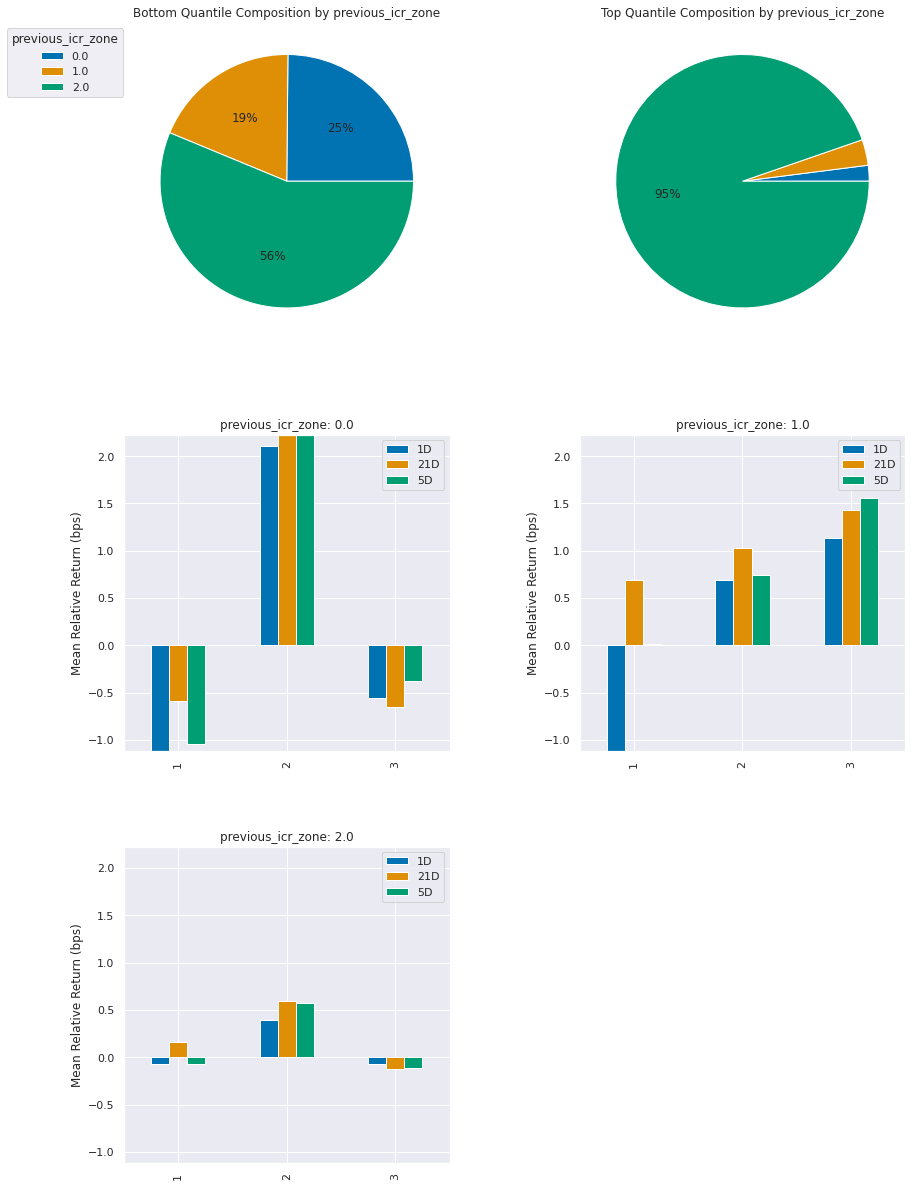

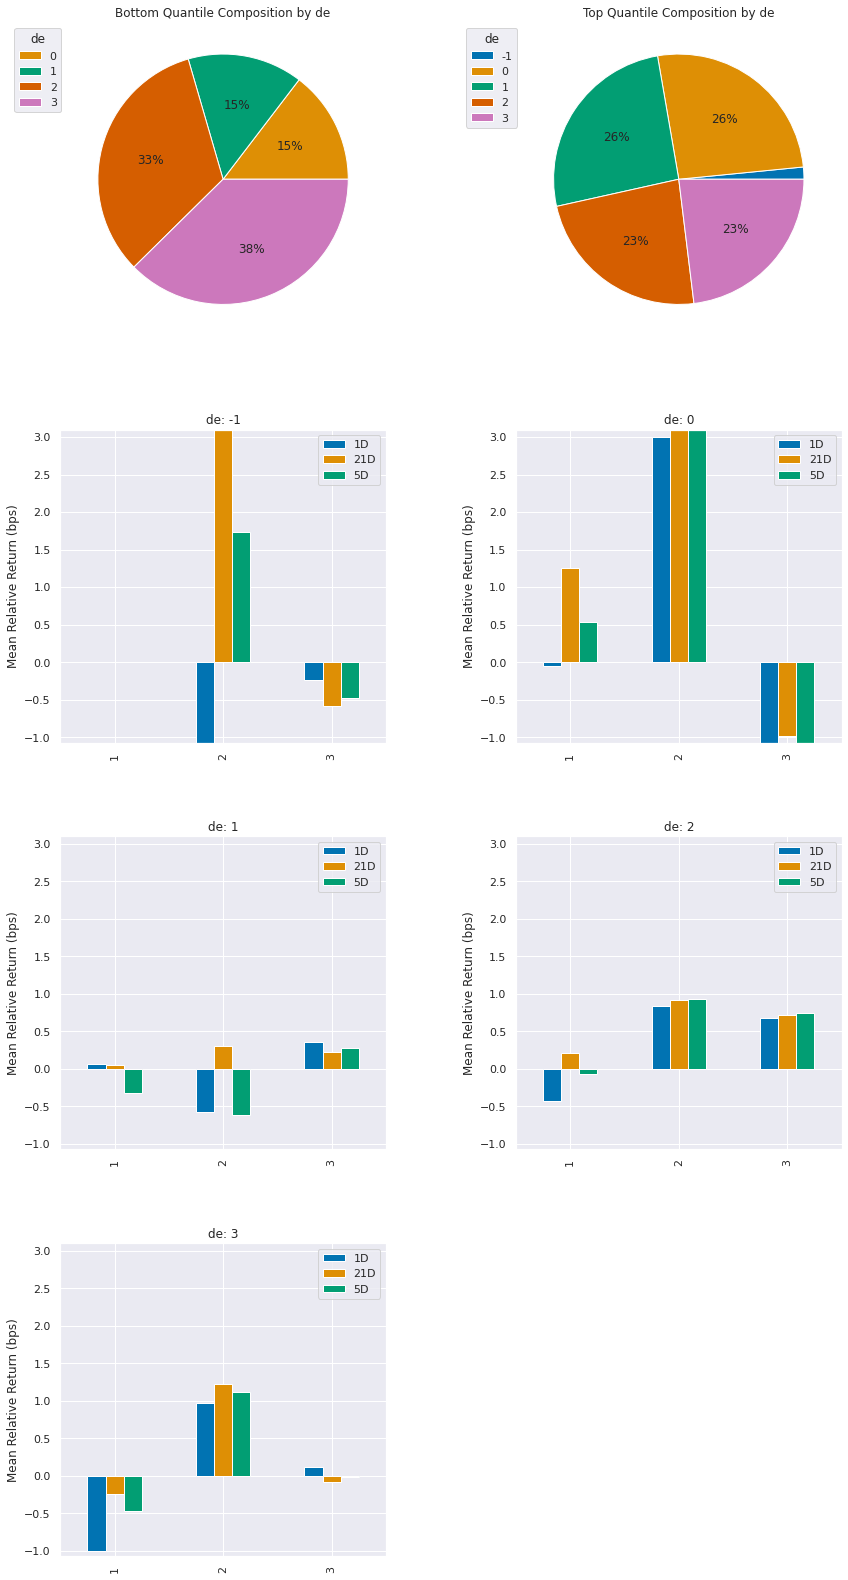

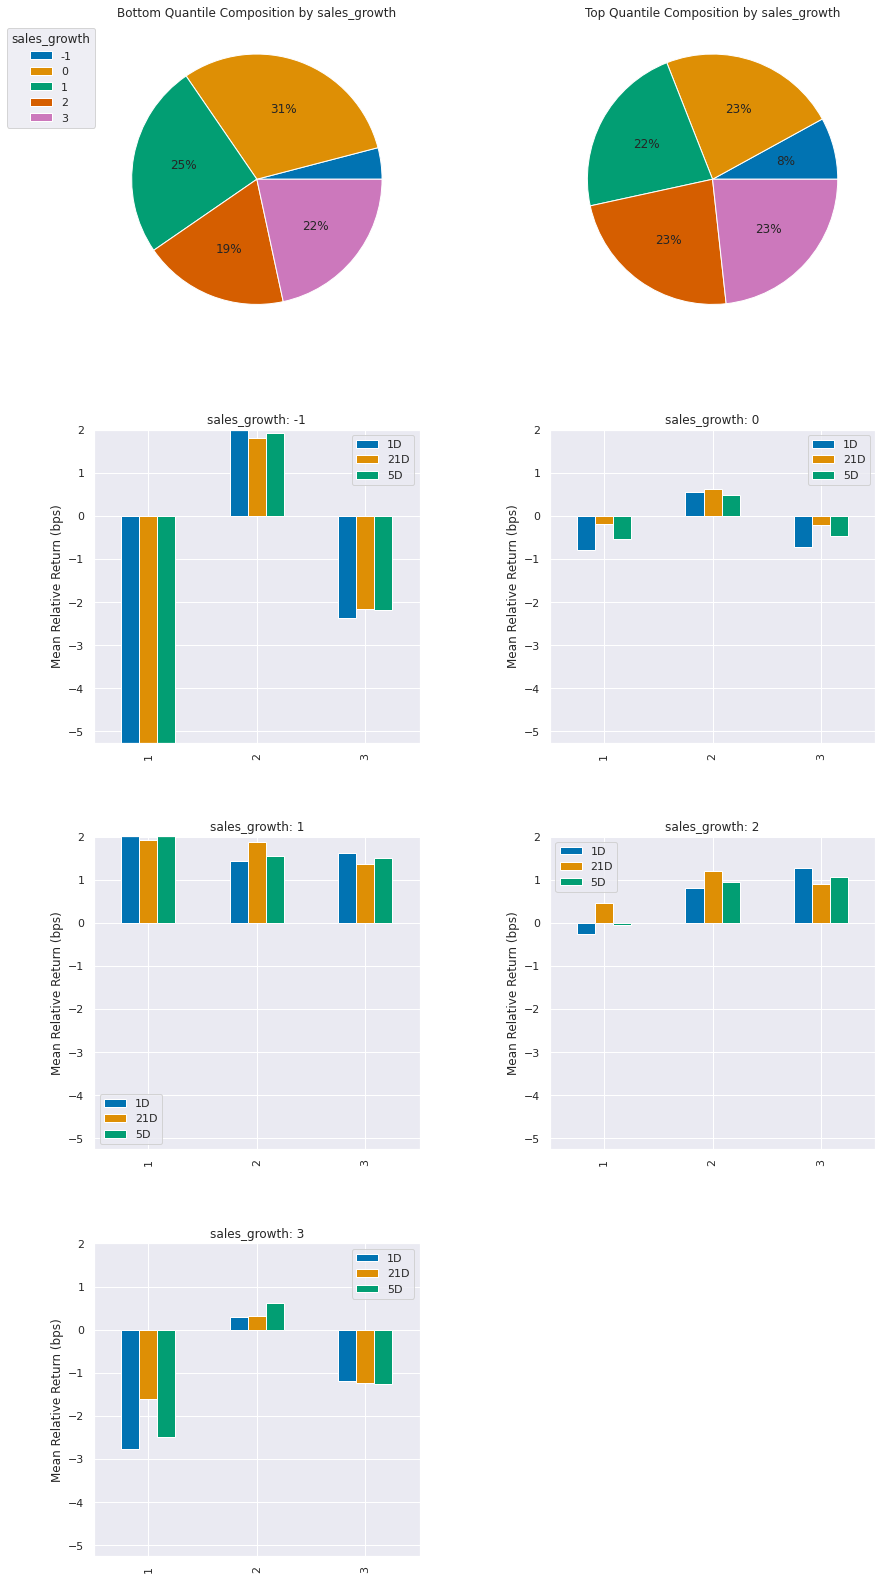

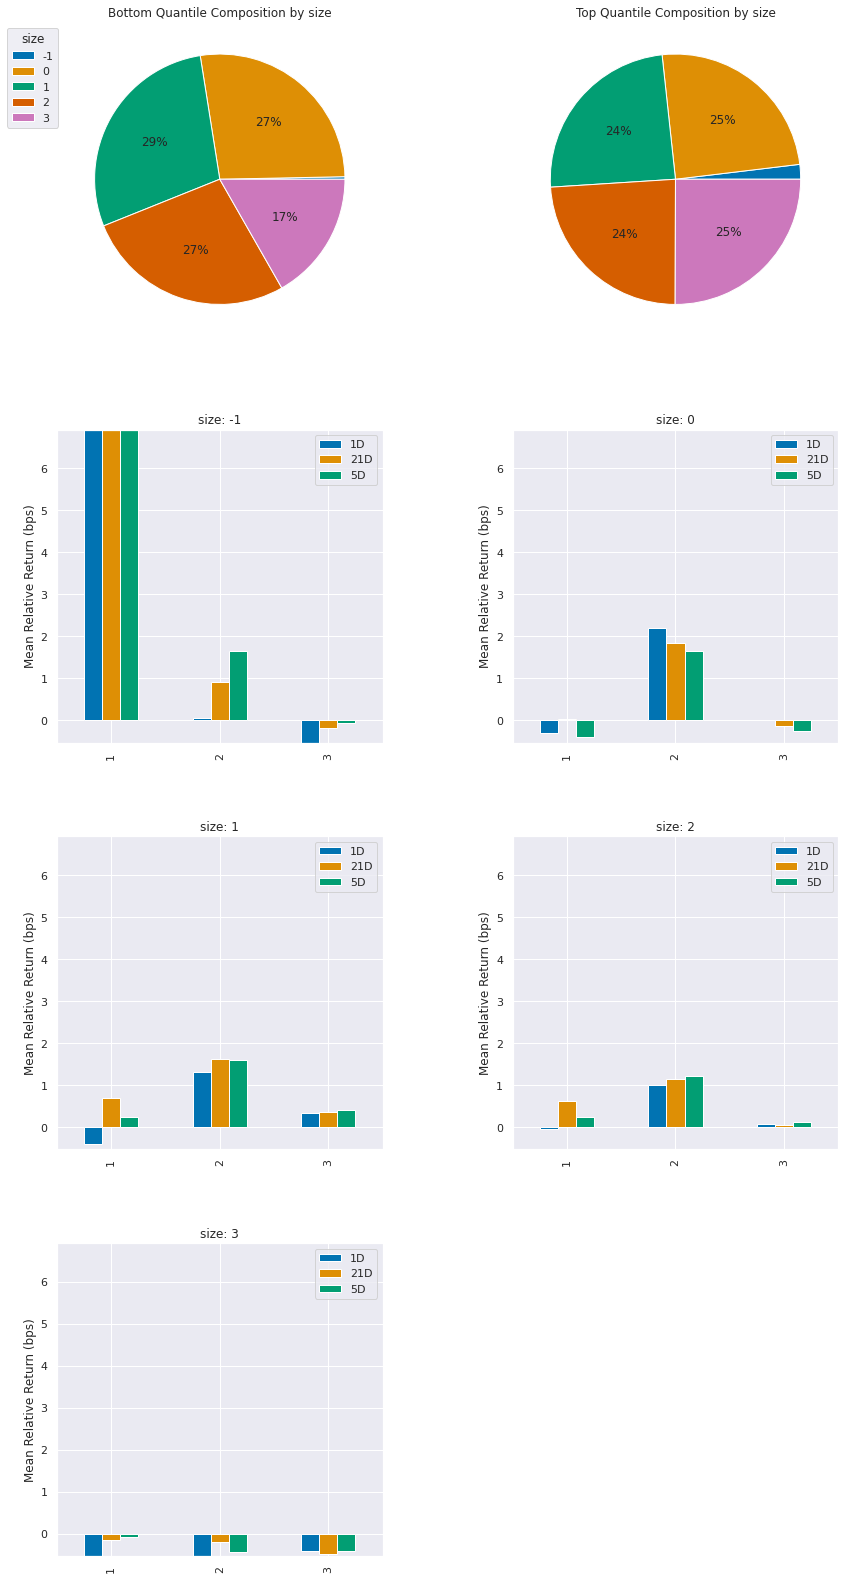

,1D,21D,5D
IC Mean,-0.001,-0.006,-0.003
IC Std.,0.037,0.046,0.041
Risk-Adjusted IC,-0.038,-0.129,-0.073
t-stat(IC),-2.810,-9.623,-5.439
p-value(IC),0.005,0.000,0.000
IC Skew,0.071,0.234,0.084
IC Kurtosis,0.148,0.206,0.020


/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [ ]:
import alphalens as al

al.from_pipeline(
    pipeline,
    start_date="1999-02-01",
    end_date="2022-12-30",
    periods=[1, 5, 21],
    factor="icr_zone",
    bins=[-1, 0, 1, 2],
    segment="Y",
    groupby=[
        "previous_icr_zone",
        "de",
        "sales_growth",
        "size"
    ] 
)

---
[Back to Introduction](Introduction.ipynb) 